In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

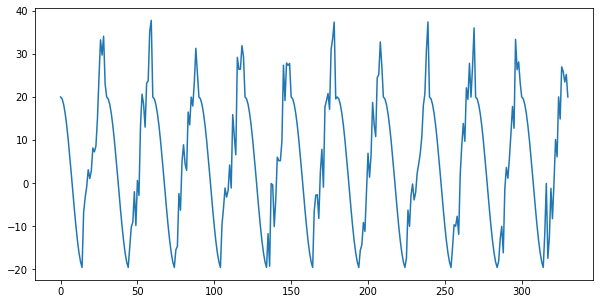

In [2]:
np.random.seed(12345)
tf.random.set_seed(12345)

x = np.arange(30 * 12 + 1)
month_time = (x % 30) / 30
y = 20 * np.where(month_time < 0.5, 
                          np.cos(2 * np.pi * month_time),
                          np.cos(2 * np.pi * month_time) + np.random.random(361))


plt.figure(figsize = (10, 5)) 
plt.plot(np.arange(0, 30 * 11 + 1), y[:30 * 11 + 1])

In [3]:
x.shape

(361,)

In [4]:
y.shape

(361,)

In [5]:
df = pd.DataFrame(data = y, index = x)

train = df.iloc[:300]
test = df.iloc[300:]

In [ ]:
#LSTM 을 이용해서 

In [6]:
train

,0
0,20.000000
1,19.562952
2,18.270909
3,16.180340
4,13.382612
...,...
295,12.742743
296,33.370896
297,26.326884
298,28.132243


In [7]:
train.shape

(300, 1)

In [8]:
test.shape

(61, 1)

In [9]:
train_1 = np.array(train).reshape(300,)

In [10]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [11]:
length = 60
generator = TimeseriesGenerator(train_1, train_1, length = length, batch_size = 1)

In [12]:
generator[0][0].shape

(1, 60)

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(60, activation="tanh", input_shape=(60,1)))
model.add(tf.keras.layers.Dense(1))

In [14]:
model.compile(optimizer="adam", loss = "mse")

In [15]:
model.fit(generator, epochs=10)

Epoch 1/10
240/240 [==============================] - 8s 5ms/step - loss: 125.8848
Epoch 2/10
240/240 [==============================] - 1s 5ms/step - loss: 42.8507
Epoch 3/10
240/240 [==============================] - 1s 5ms/step - loss: 26.4436
Epoch 4/10
240/240 [==============================] - 1s 5ms/step - loss: 22.7014
Epoch 5/10
240/240 [==============================] - 1s 4ms/step - loss: 19.1487
Epoch 6/10
240/240 [==============================] - 1s 5ms/step - loss: 19.4332
Epoch 7/10
240/240 [==============================] - 1s 4ms/step - loss: 17.4635
Epoch 8/10
240/240 [==============================] - 1s 5ms/step - loss: 17.6553
Epoch 9/10
240/240 [==============================] - 1s 5ms/step - loss: 16.7403
Epoch 10/10
240/240 [==============================] - 1s 5ms/step - loss: 16.0895


In [26]:
length = 30
test_1 = np.array(test).reshape(61,)

In [27]:
generator_test = TimeseriesGenerator(test_1, test_1, length = length, batch_size = 1)

In [28]:
test_1

array([ 20.        ,  19.56295201,  18.27090915,  16.18033989,
        13.38261213,  10.        ,   6.18033989,   2.09056927,
        -2.09056927,  -6.18033989, -10.        , -13.38261213,
       -16.18033989, -18.27090915, -19.56295201, -11.76794447,
        -0.0604446 , -17.44077833, -12.442054  ,  -1.20725237,
        -8.2556257 ,   0.14542319,  10.11214626,   6.11446352,
        20.01829422,  14.89253942,  26.99004605,  25.89909447,
        23.48080539,  25.2177584 ,  20.        ,  19.56295201,
        18.27090915,  16.18033989,  13.38261213,  10.        ,
         6.18033989,   2.09056927,  -2.09056927,  -6.18033989,
       -10.        , -13.38261213, -16.18033989, -18.27090915,
       -19.56295201, -19.92351503, -18.74359595, -11.29181184,
       -14.34125367,  -2.9762976 ,  -5.68500373,  13.65299101,
         3.25317396,  15.69393032,  16.70526227,  18.79846139,
        26.61371704,  18.87604338,  34.02788925,  22.32250603,
        20.        ])

In [29]:
generator_test[0], generator_test[-31]

((array([[ 20.        ,  19.56295201,  18.27090915,  16.18033989,
           13.38261213,  10.        ,   6.18033989,   2.09056927,
           -2.09056927,  -6.18033989, -10.        , -13.38261213,
          -16.18033989, -18.27090915, -19.56295201, -11.76794447,
           -0.0604446 , -17.44077833, -12.442054  ,  -1.20725237,
           -8.2556257 ,   0.14542319,  10.11214626,   6.11446352,
           20.01829422,  14.89253942,  26.99004605,  25.89909447,
           23.48080539,  25.2177584 ]]), array([20.])),
 (array([[ 20.        ,  19.56295201,  18.27090915,  16.18033989,
           13.38261213,  10.        ,   6.18033989,   2.09056927,
           -2.09056927,  -6.18033989, -10.        , -13.38261213,
          -16.18033989, -18.27090915, -19.56295201, -19.92351503,
          -18.74359595, -11.29181184, -14.34125367,  -2.9762976 ,
           -5.68500373,  13.65299101,   3.25317396,  15.69393032,
           16.70526227,  18.79846139,  26.61371704,  18.87604338,
           34.027889

In [30]:
predict_test = model.predict(generator_test)

31/31 [==============================] - 0s 2ms/step


In [31]:
predict_test.shape

(31, 1)

In [32]:
test_2 = test.drop(test.index[0:length])

In [33]:
test_2["predict_test_simplernn"] = predict_test

In [34]:
test_2

,0,predict_test_simplernn
330,20.000000,24.290417
331,19.562952,21.050093
332,18.270909,17.836706
333,16.180340,15.500434
334,13.382612,13.139884
335,10.000000,10.277006
336,6.180340,6.786087
337,2.090569,2.201343
338,-2.090569,-2.336904
339,-6.180340,-6.399340


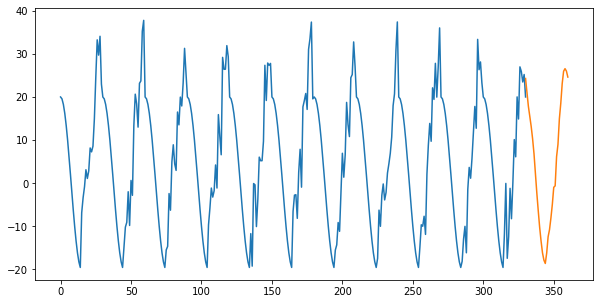

In [35]:
plt.figure(figsize = (10, 5)) 
plt.plot(np.arange(0, 30 * 11 + 1), y[:30 * 11 + 1])
plt.plot(test_2.index, test_2.predict_test_simplernn) # predict

In [ ]:
# 강사님 풀이

In [ ]:
# LSTM, GRU 을 이용해서 model 을 학습시키고 https://www.tensorflow.org/guide/keras/rnn?hl=ko 
# x 축을 360 이후로 Data를 예측해보세요.
# RNN model을 다중으로 구성하기 위해서는 return_sequences = True 를 활성화 해줘야 합니다. 

In [36]:
df = pd.DataFrame(data = y, index = x, columns = ['time_cos'])

In [69]:
df

,time_cos
0,20.000000
1,19.562952
2,18.270909
3,16.180340
4,13.382612
...,...
356,26.613717
357,18.876043
358,34.027889
359,22.322506


In [37]:
train_set = y

In [38]:
y.shape

(361,)

In [39]:
from sklearn.preprocessing import MinMaxScaler # 0~1값으로 줄여준다. loss값 안커지게 하려고

scaler = MinMaxScaler()
# scaler.fit(df)

s_train = scaler.fit_transform(df)

In [40]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 30
generator = TimeseriesGenerator(s_train, s_train, length = length, batch_size=1)

In [47]:
generator[0][0].shape

(1, 30, 1)

In [44]:
model_lstm = tf.keras.models.Sequential(name='model_lstm')
model_lstm.add(tf.keras.layers.LSTM(30, input_shape = (30,1))) # (1, 30, 1) 여도 알아서 바꿔줌.
model_lstm.add(tf.keras.layers.Dense(1))

model_lstm.compile(optimizer = 'adam', loss = 'mse')

In [45]:
model_lstm_sig = tf.keras.models.Sequential(name='model_lstm_sig')
model_lstm_sig.add(tf.keras.layers.LSTM(30, activation = 'sigmoid', input_shape = (30,1))) 
model_lstm_sig.add(tf.keras.layers.Dense(1))

model_lstm_sig.compile(optimizer = 'adam', loss = 'mse')

In [48]:
model_gru = tf.keras.models.Sequential(name="model_gru")
model_gru.add(tf.keras.layers.GRU(30, input_shape=(30,1)))
model_gru.add(tf.keras.layers.Dense(1))

model_gru.compile(optimizer = 'adam', loss = 'mse')

In [49]:
model_lstm_gru = tf.keras.models.Sequential(name="model_lstm_gru")
model_lstm_gru.add(tf.keras.layers.LSTM(30, return_sequences=True, input_shape=(30,1))) # litm, gru 둘 다 RNN 모델이라 seuquence model로 유지해줌 
model_lstm_gru.add(tf.keras.layers.GRU(30))
model_lstm_gru.add(tf.keras.layers.Dense(1))

model_lstm_gru.compile(optimizer = 'adam', loss = 'mse')

In [50]:
model_lstm_gru.summary()

Model: "model_lstm_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 30)            3840      
                                                                 
 gru_1 (GRU)                 (None, 30)                5580      
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 9,451
Trainable params: 9,451
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_list = [model_lstm_sig, model_lstm, model_gru, model_lstm_gru]
for i in model_list:
  i.fit(generator, epochs=5)

Epoch 1/5
331/331 [==============================] - 16s 44ms/step - loss: 0.0607
Epoch 2/5
331/331 [==============================] - 14s 44ms/step - loss: 0.0374
Epoch 3/5
331/331 [==============================] - 14s 43ms/step - loss: 0.0254
Epoch 4/5
331/331 [==============================] - 15s 46ms/step - loss: 0.0186
Epoch 5/5
331/331 [==============================] - 14s 43ms/step - loss: 0.0164
Epoch 1/5
331/331 [==============================] - 3s 4ms/step - loss: 0.0313
Epoch 2/5
331/331 [==============================] - 1s 4ms/step - loss: 0.0079
Epoch 3/5
331/331 [==============================] - 2s 5ms/step - loss: 0.0072
Epoch 4/5
331/331 [==============================] - 1s 4ms/step - loss: 0.0070
Epoch 5/5
331/331 [==============================] - 1s 4ms/step - loss: 0.0066
Epoch 1/5
331/331 [==============================] - 3s 4ms/step - loss: 0.0188
Epoch 2/5
331/331 [==============================] - 1s 4ms/step - loss: 0.0085
Epoch 3/5
331/331 [===========

In [52]:
df_2 = df.drop(df.index[0:length])
for i in model_list:
  tmp = i.predict(generator)
  tmp_2 = scaler.inverse_transform(tmp)
  df_2[i.name] = tmp_2 

331/331 [==============================] - 1s 3ms/step


In [53]:
df_2

,time_cos,model_lstm_sig,model_lstm,model_gru,model_lstm_gru
30,20.000000,23.797176,22.195116,23.222443,26.901943
31,19.562952,20.898970,19.360882,18.339916,23.434526
32,18.270909,20.032993,16.420229,15.019973,19.626322
33,16.180340,18.908634,13.401620,12.215783,15.765020
34,13.382612,17.231737,10.332994,9.430357,11.915921
...,...,...,...,...,...
356,26.613717,17.258764,20.342772,21.460949,25.518862
357,18.876043,22.977505,22.860914,24.982697,28.116501
358,34.027889,19.133198,22.455973,22.641399,28.062914
359,22.322506,28.612032,24.355919,27.243309,29.354216


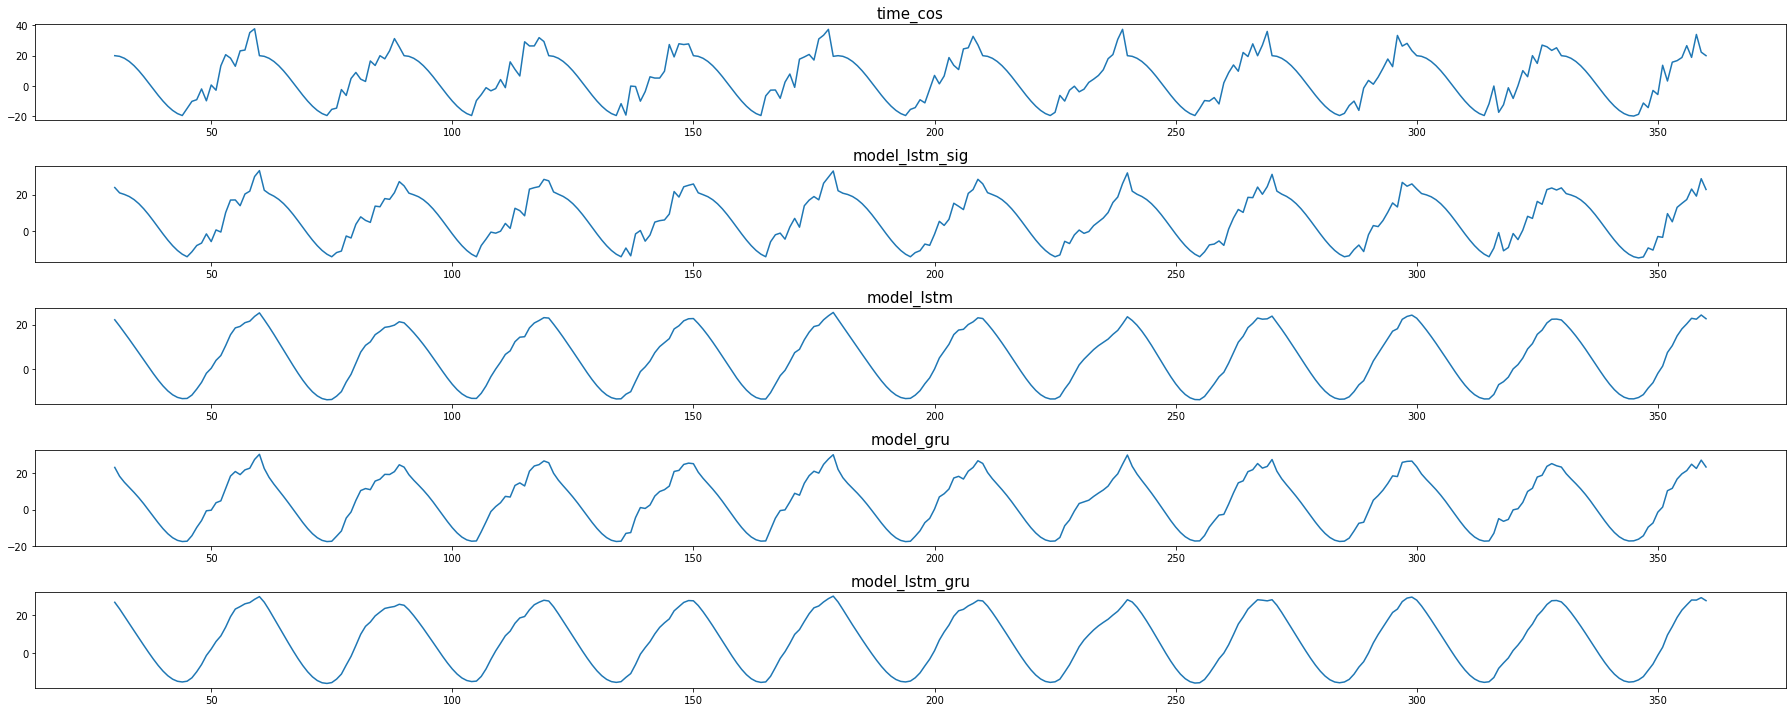

In [54]:
plt.figure(figsize=(25,10))
n=1
for i in df_2.columns:
    ax = plt.subplot(len(df_2.columns),1,n)
    plt.title(f"{i}", fontsize=15)
    ax.plot(df_2.index, df_2[i], label=str(i))
    n+=1
plt.tight_layout()

In [55]:
s_train.shape

(361, 1)

In [56]:
s_train[-30:].shape

(30, 1)

In [65]:
s_train.shape

(361, 1)

1/1 [==============================] - 0s 20ms/step


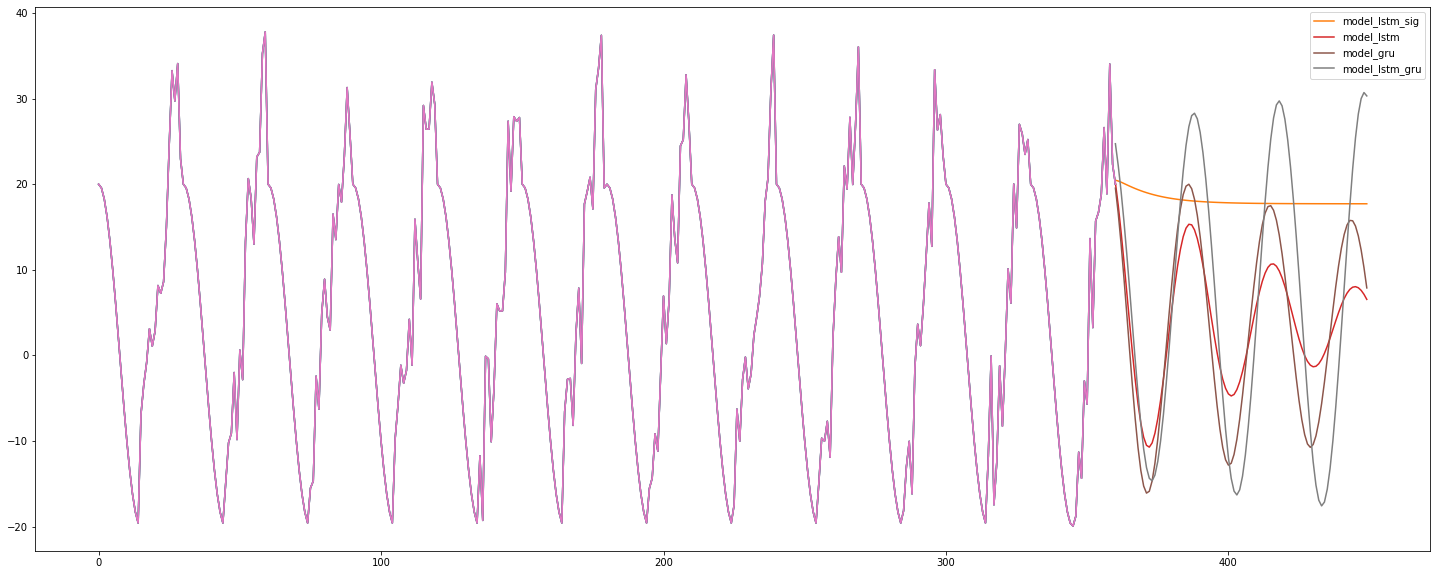

In [68]:
# predict

plt.figure(figsize=(25,10))

for i in model_list:
  forecast = [] # 예측값 널을 list
  batch = s_train[-30:] # 361부터 예측하기 위해 사용할 값 [330-359]
  current_batch = batch.reshape((1, 30, 1)) # minmax ->timeseriesgenerator -> 1, 30, 1
  forecast_index = np.arange(360, 450, step=1) # 에측한 값의 index
  for j in range(90):
    current_pred = i.predict(current_batch)[0] # 예측한 값
    forecast.append(current_pred) # 예측한 값 추가
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
  forecast = scaler.inverse_transform(forecast)
  
  plt.plot(df.index, df['time_cos'])
  plt.plot(forecast_index, forecast, label=f"{i.name}")
  plt.legend(loc='upper right')